In [219]:
import pandas as pd
import numpy as np


def rmse(data1, data2):

        data = {'Valor_Real': data1,
        'Valor_Previsto': data2}

        df = pd.DataFrame(data)
        
        # Calcule as diferenças entre os valores reais e previstos
        df['Diferenca'] = df['Valor_Real'] - df['Valor_Previsto']

        # Eleve ao quadrado as diferenças
        df['Diferenca_Quadrada'] = df['Diferenca'] ** 2

        # Calcule a média das diferenças ao quadrado
        mse = df['Diferenca_Quadrada'].mean()

        # Calcule a raiz quadrada do MSE para obter o RMSE
        rmse = np.sqrt(mse)

        return rmse

        #print("RMSE: ", rmse)

df1 = pd.read_csv("../../datasets/intervalos-completos/vazao/cubic 06-10-2023/tratado cubic esmond data pr-am 06-10-2023_longest_interval.csv")
data1= df1["Vazao"]

df2 = pd.read_csv("../../datasets/intervalos-completos/vazao/dados-preenchidos/cubic 06-10-2023/pr-am/mediana movel.csv")
data2=df2["Vazao"]

rmse(data1, data2)

43681268.60734942

'mg-rs': [423968961.46529955, 449382089.5230629, 285974805.2085109, 397166208.260255],
'pa-ba': [194584415.17134446, 185667361.3843929, 180254290.97753015, 207080739.31680924],
'pr-am': [144635454.9914372, 104591314.5940091, 117895026.03383109, 43681268.60734942]

In [193]:
import pandas as pd
import numpy as np

def gerar_desvio_padrao(df):

        desvio_padrao = np.std(df["Vazao"])

        print(desvio_padrao)

import os
import numpy as np
#bbr
pasta_dados_completos = "../../datasets/intervalos-completos/vazao/bbr 06-10-2023"
pasta_dados_preenchidos = "../../datasets/intervalos-completos/vazao/dados-preenchidos/bbr 06-10-2023"

def gerar_porcentagem(array):
    cont = array.count('1')
    porcentagem = (cont/len(array)) * 100
    return porcentagem

def substituir_valor(valor):
    if valor < 200000000:
        return "r"
    elif 200000000 <= valor < 500000000:
        return "o"
    elif 500000000 <= valor < 800000000:
        return "y"
    elif 800000000 <= valor < 1000000000:
        return "b"
    else:
        return "g"

def criar_faixas(preenchido, completo):
    df_preenchido = pd.read_csv(preenchido)
    df_completo = pd.read_csv(completo)
    df_comparativo = pd.DataFrame()
    df_comparativo["Vazao Completa"] = df_completo["Vazao"]
    df_comparativo["Vazao Preenchida"] = df_preenchido["Vazao"]
    df_comparativo["Vazao Faixa"] = 0
    df_comparativo['Vazao Completa'] = df_comparativo['Vazao Completa'].apply(substituir_valor)
    df_comparativo['Vazao Preenchida'] = df_comparativo['Vazao Preenchida'].apply(substituir_valor)
    df_comparativo['Vazao Faixa'] = df_comparativo.apply(lambda row: 1 if row['Vazao Completa'] == row['Vazao Preenchida'] else 0, axis=1)
    cont = (df_comparativo['Vazao Faixa'] == 1).sum()
    porcentagem = (cont/len(df_comparativo)) * 100
    return porcentagem
    

def gerar_faixas(completos_pasta, preenchidos_pasta):
    # if "bbr" in caminho: tipo = "bbr"
    # elif "cubic" in caminho: tipo = "cubic"
    for pasta in os.listdir(completos_pasta):
        if "ce-sp" in pasta: nome = "ce-sp"
        if "mg-rs" in pasta: nome = "mg-rs"
        if "pa-ba" in pasta: nome = "pa-ba"
        if "pr-am" in pasta: nome = "pr-am"
        if "df-rj" in pasta: nome = "df-rj"
        caminho_completo = os.path.join(completos_pasta, pasta)
        caminho = os.path.join(preenchidos_pasta, nome)
        dic = {}
        #resultado_df = pd.DataFrame()
        for arquivo in os.listdir(caminho):
            caminho_arquivo = os.path.join(caminho, arquivo)
            #df = pd.DataFrame()
            p = criar_faixas(caminho_arquivo, caminho_completo)
            if nome in dic: dic[nome].append(p)
            else: dic[nome] = [p]
            #nome_coluna = f"Vazao Faixa: {arquivo}"
            #resultado_df[nome_coluna] = df["Vazao Faixa"]
        #resultado_df.to_csv("../" + nome +".csv", index=False)
        print(dic)

gerar_faixas(pasta_dados_completos, pasta_dados_preenchidos)


df1 = pd.read_csv("../../datasets/intervalos-completos/vazao/bbr 06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv")
gerar_desvio_padrao(df1)

KeyError: 'Vazao Faixa'

In [25]:
import matplotlib.pyplot as plt

def plotar_grafico_colunas(rmse_values):
    labels = ['Linear Interp.', 'Time Weightned Interp.', 'KNN', 'Moving Average', 'Moving Median']
    label_font_size = 7
    colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    # colors = ['#ce593d', '#af5941', '#5aa5a9', '#07375b', '#5c5034']

    plt.bar(labels, rmse_values, color=colors)
    plt.xticks(fontsize=label_font_size)
    
    plt.xlabel('Methods')
    plt.ylabel('RMSE')
    plt.title('RMSE Values BBR MG-RS')

    plt.show()


In [164]:
import os

# Gerando o RMSE de todos os datasets >bbr 06-10-2023 mg-rs<
todos_rmse = []
df1 = pd.read_csv("../datasets/intervalos-completos/vazao/bbr 06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../datasets/intervalos-completos/vazao/analise-rsme/bbr mg-rs"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = rmse(data1, data2)
    todos_rmse.append(rmse_arq)

todos_rmse

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/intervalos-completos/vazao/bbr 06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv'

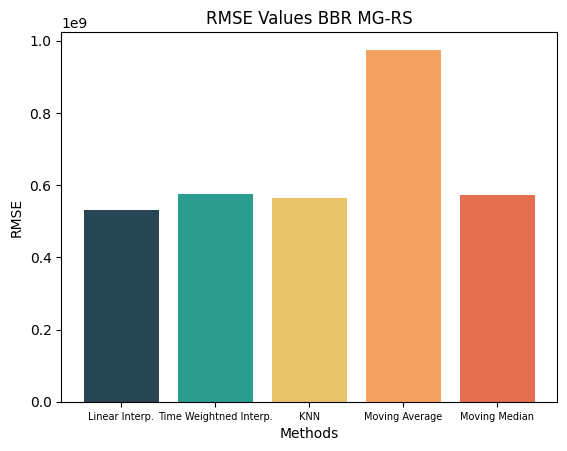

In [48]:
rmsesss = [531829079.8807543,575528369.7296691, 563359529.9106877, 974998738.1611362, 572722463.2430964]
plotar_grafico_colunas(rmsesss)

In [186]:
import os

# Gerando o RMSE de todos os datasets >bbr 06-10-2023 mg-rs<
todos_rmse2 = []
df1 = pd.read_csv("../../datasets/intervalos-completos/vazao/cubic 06-10-2023/tratado cubic esmond data mg-rs 06-10-2023_longest_interval.csv")
data1 = df1["Vazao"]
diretorio = "../../datasets/intervalos-completos/vazao/dados-preenchidos/cubic 06-10-2023/mg-rs"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    data2 = df2["Vazao"]
    rmse_arq = rmse(data1, data2)
    print(arquivo)
    # todos_rmse2.append(rmse_arq)

todos_rmse2

interp linear.csv
media movel.csv
knn.csv
mediana movel.csv


[]

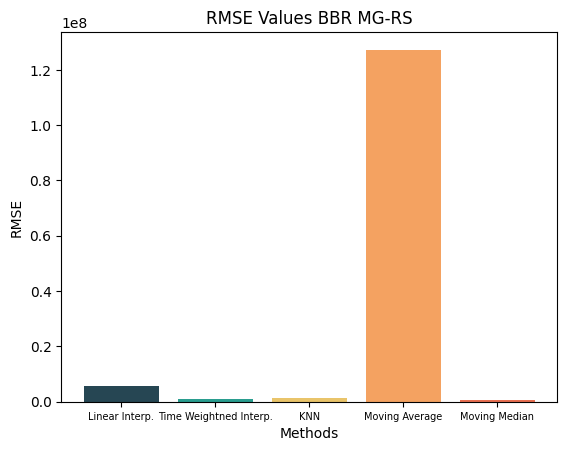

In [21]:
plotar_grafico_colunas(todos_rmse2)

In [229]:
import os
import numpy as np
#bbr
pasta_dados_completos = "../../datasets/intervalos-completos/vazao/cubic 06-10-2023"
pasta_dados_preenchidos = "../../datasets/intervalos-completos/vazao/dados-preenchidos/cubic 06-10-2023"

def gerar_porcentagem(array):
    cont = array.count('1')
    porcentagem = (cont/len(array)) * 100
    return porcentagem

def substituir_valor(valor):
    if valor < 200000000:
        return "r"
    elif 200000000 <= valor < 500000000:
        return "o"
    elif 500000000 <= valor < 800000000:
        return "y"
    elif 800000000 <= valor < 1000000000:
        return "b"
    else:
        return "g"

def criar_faixas(preenchido, completo):
    df_preenchido = pd.read_csv(preenchido)
    df_completo = pd.read_csv(completo)
    df_comparativo = pd.DataFrame()
    df_comparativo["Vazao Completa"] = df_completo["Vazao"]
    df_comparativo["Vazao Preenchida"] = df_preenchido["Vazao"]
    df_comparativo["Vazao Faixa"] = 0
    df_comparativo['Vazao Completa'] = df_comparativo['Vazao Completa'].apply(substituir_valor)
    df_comparativo['Vazao Preenchida'] = df_comparativo['Vazao Preenchida'].apply(substituir_valor)
    df_comparativo['Vazao Faixa'] = df_comparativo.apply(lambda row: 1 if row['Vazao Completa'] == row['Vazao Preenchida'] else 0, axis=1)
    cont = (df_comparativo['Vazao Faixa'] == 1).sum()
    porcentagem = (cont/len(df_comparativo)) * 100
    return porcentagem
    

def gerar_faixas(completos_pasta, preenchidos_pasta):
    # if "bbr" in caminho: tipo = "bbr"
    # elif "cubic" in caminho: tipo = "cubic"
    for pasta in os.listdir(completos_pasta):
        if "ce-sp" in pasta: nome = "ce-sp"
        if "mg-rs" in pasta: nome = "mg-rs"
        if "pa-ba" in pasta: nome = "pa-ba"
        if "pr-am" in pasta: nome = "pr-am"
        if "df-rj" in pasta: nome = "df-rj"
        caminho_completo = os.path.join(completos_pasta, pasta)
        caminho = os.path.join(preenchidos_pasta, nome)
        dic = {}
        #resultado_df = pd.DataFrame()
        for arquivo in os.listdir(caminho):
            caminho_arquivo = os.path.join(caminho, arquivo)
            #df = pd.DataFrame()
            p = criar_faixas(caminho_arquivo, caminho_completo)
            if nome in dic: dic[nome].append(p)
            else: dic[nome] = [p]
            #nome_coluna = f"Vazao Faixa: {arquivo}"
            #resultado_df[nome_coluna] = df["Vazao Faixa"]
        #resultado_df.to_csv("../" + nome +".csv", index=False)
        print(dic)

gerar_faixas(pasta_dados_completos, pasta_dados_preenchidos)



{'pa-ba': [88.23529411764706, 73.52941176470588, 70.58823529411765, 85.29411764705883]}
{'mg-rs': [90.625, 90.625, 96.875, 93.75]}
{'df-rj': [87.09677419354838, 90.32258064516128, 87.09677419354838, 87.09677419354838]}
{'pr-am': [70.58823529411765, 64.70588235294117, 94.11764705882352, 76.47058823529412]}
{'ce-sp': [97.82608695652173, 76.08695652173914, 100.0, 97.82608695652173]}


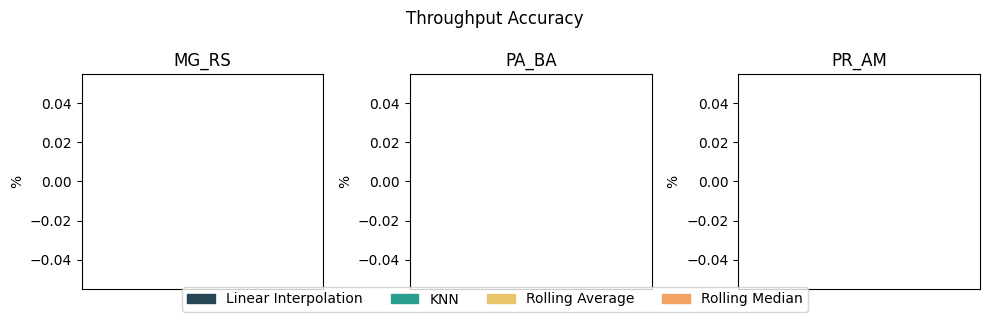

In [220]:
import matplotlib.pyplot as plt

todos_rsmes = {
    'mg-rs': [423968961.46529955, 449382089.5230629, 285974805.2085109, 397166208.260255],
'pa-ba': [194584415.17134446, 185667361.3843929, 180254290.97753015, 207080739.31680924],
'pr-am': [144635454.9914372, 104591314.5940091, 117895026.03383109, 43681268.60734942]
}

# Seus dados para os gráficos de colunas
dados2 = todos_rsmes.get('mg-rs', [])
dados3 = todos_rsmes.get('pa-ba', [])
dados4 = todos_rsmes.get('pr-am', [])
dados5 = todos_rsmes.get('mg-rs2', [])
dados6 = todos_rsmes.get('pa-ba2', [])
dados7 = todos_rsmes.get('pr-am2', [])

# Defina as cores personalizadas
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261']

fig, ((ax5, ax6, ax7)) = plt.subplots(1, 3, figsize=(10, 3))


# Plote o segundo gráfico de colunas no segundo subplot
ax5.bar(range(len(dados6)), dados5, color=colors)
ax5.set_title('MG_RS')
ax5.set_ylabel('%')
ax5.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Plote o segundo gráfico de colunas no segundo subplot
ax6.bar(range(len(dados6)), dados6, color=colors)
ax6.set_title('PA_BA')
ax6.set_ylabel('%')
ax6.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Plote o segundo gráfico de colunas no segundo subplot
ax7.bar(range(len(dados7)), dados7, color=colors)
ax7.set_title('PR_AM')
ax7.set_ylabel('%')
ax7.get_xaxis().set_visible(False)  # Remover os números do eixo x

# Configure a posição e estilo das legendas
fig.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],labels=['Linear Interpolation', 'KNN', 'Rolling Average', 'Rolling Median'],loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))  # Ajuste o valor de y aqui

# Adicione um título à figura inteira
plt.suptitle('Throughput Accuracy')

# Ajuste o espaço entre os subplots para evitar sobreposições
plt.tight_layout()

# Exiba a figura
plt.show()


In [204]:
import pandas as pd

pasta_dados_completos = "../../datasets/intervalos-completos/vazao/cubic 06-10-2023"
pasta_dados_preenchidos = "../../datasets/intervalos-completos/vazao/dados-preenchidos/cubic 06-10-2023"

def gerar_faixas(completos_pasta, preenchidos_pasta):
    # if "bbr" in caminho: tipo = "bbr"
    # elif "cubic" in caminho: tipo = "cubic"
    for pasta in os.listdir(completos_pasta):
        if "ce-sp" in pasta: nome = "ce-sp"
        if "mg-rs" in pasta: nome = "mg-rs"
        if "pa-ba" in pasta: nome = "pa-ba"
        if "pr-am" in pasta: nome = "pr-am"
        if "df-rj" in pasta: nome = "df-rj"
        caminho_completo = os.path.join(completos_pasta, pasta)
        caminho = os.path.join(preenchidos_pasta, nome)
        dic = {}
        #resultado_df = pd.DataFrame()
        for arquivo in os.listdir(caminho):
            caminho_arquivo = os.path.join(caminho, arquivo)
            #df = pd.DataFrame()
            df1 = pd.read_csv(caminho_arquivo)
            data1 = df1["Vazao"]
            df1 = pd.read_csv(caminho_completo)
            data2 = df2["Vazao"]
            p = rmse(data1, data2)
            if nome in dic: dic[nome].append(p)
            else: dic[nome] = [p]
            #nome_coluna = f"Vazao Faixa: {arquivo}"
            #resultado_df[nome_coluna] = df["Vazao Faixa"]
        #resultado_df.to_csv("../" + nome +".csv", index=False)
        print(dic)

gerar_faixas(pasta_dados_completos, pasta_dados_preenchidos)

{'pa-ba': [831457146.0361302, 902378332.8448815, 830037200.6478924, 828758530.0937586]}
{'mg-rs': [169815641.1923828, 184792786.1673879, 161434922.06289524, 0.0]}
{'df-rj': [1003508874.7632815, 1018204151.8498688, 992655885.3925967, 992807652.6830486]}
{'pr-am': [976247308.457132, 989079631.414496, 968345154.4925414, 940321535.5030373]}
{'ce-sp': [715114203.5936903, 767238286.0933231, 715501443.7065578, 724710914.2917039]}


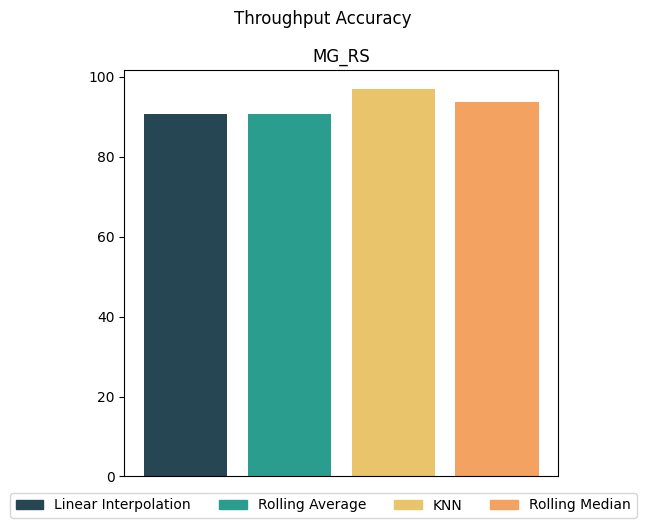

In [234]:
import matplotlib.pyplot as plt

todos_rsmes = {'pa-ba': [88.23529411764706, 73.52941176470588, 70.58823529411765, 85.29411764705883],
'mg-rs': [90.625, 90.625, 96.875, 93.75],
'df-rj': [87.09677419354838, 90.32258064516128, 87.09677419354838, 87.09677419354838],
'pr-am': [70.58823529411765, 64.70588235294117, 94.11764705882352, 76.47058823529412],
'ce-sp': [97.82608695652173, 76.08695652173914, 100.0, 97.82608695652173]}

# Seus dados para os gráficos de colunas
dados5 = todos_rsmes.get('mg-rs', [])
dados6 = todos_rsmes.get('pa-ba', [])
dados7 = todos_rsmes.get('pr-am', [])

# Defina as cores personalizadas
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261']

fig, ((ax5)) = plt.subplots(1, 1, figsize=(5, 5))


ax5.bar(range(len(dados5)), dados5, color=colors)
ax5.set_title('MG_RS')
ax5.get_xaxis().set_visible(False)  # Remover os números do eixo x

# # Plote o segundo gráfico de colunas no segundo subplot
# ax6.bar(range(len(dados6)), dados6, color=colors)
# ax6.set_title('PA_BA')
# ax6.get_xaxis().set_visible(False)  # Remover os números do eixo x

# # Plote o segundo gráfico de colunas no segundo subplot
# ax7.bar(range(len(dados7)), dados7, color=colors)
# ax7.set_title('PR_AM')
# ax7.get_xaxis().set_visible(False)  # Remover os números do eixo x


# Configure a posição e estilo das legendas
fig.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],labels=['Linear Interpolation', 'Rolling Average', 'KNN', 'Rolling Median'],loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))  # Ajuste o valor de y aqui

# Adicione um título à figura inteira
plt.suptitle('Throughput Accuracy')

# Ajuste o espaço entre os subplots para evitar sobreposições
plt.tight_layout()

# Exiba a figura
plt.show()
